# ML Model #1 
In this notebook, we utilize the first difference calculation of ACS/BRFSS data on 2021/2022 data to create a machine learning algorithm to understand the relationship between the variables and diabetes prevalence. This is to understand the variables that may have no linear relationships to compare to the two-stage linear regression. 

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

seed = 418
np.random.seed(seed)

use y1 to predict y2, 
state and region 
ML # 1 current
ML # 2 Y1 vs Y2
ML # 3 minimal data 

In [17]:
df = pd.read_csv('../../02_data/02.03_results/struct_acs_brfss.csv')
df.columns

Index(['fips', 'diff_brfss_access2', 'diff_brfss_checkup',
       'diff_brfss_csmoking', 'diff_brfss_depression', 'diff_brfss_diabetes',
       'diff_brfss_ghlth', 'diff_brfss_mhlth', 'diff_brfss_obesity',
       'diff_acs_pct_age_gte65', 'diff_acs_pct_dg_bb_int',
       'diff_acs_pct_ed_9_12', 'diff_acs_pct_ed_asc', 'diff_acs_pct_ed_b',
       'diff_acs_pct_ed_gr', 'diff_acs_pct_ed_hs', 'diff_acs_pct_ed_lt9',
       'diff_acs_pct_ed_sc', 'diff_acs_pct_eth_hisp',
       'diff_acs_pct_hlth_unins', 'diff_acs_pct_occ_mgt',
       'diff_acs_pct_occ_nat_res', 'diff_acs_pct_occ_prod',
       'diff_acs_pct_occ_sales', 'diff_acs_pct_occ_svc',
       'diff_acs_pct_occ_unemp', 'diff_acs_pct_race_aian',
       'diff_acs_pct_race_asian', 'diff_acs_pct_race_black',
       'diff_acs_pct_race_nhopi', 'diff_acs_pct_race_other',
       'diff_acs_pct_race_white', 'diff_acs_pct_ses_pov',
       'diff_acs_pct_sex_female', 'diff_acs_pct_sex_male',
       'diff_acs_pct_tp_veh_0', 'diff_acs_pct_tp_veh_1',
  

In [18]:
target = [
    'diff_brfss_diabetes' # BRFSS Age-Adjusted Prevalence (2022-2021)
]

features = [
    'diff_brfss_access2', # Current lack of health insurance among adults aged 18-64 years
    'diff_brfss_checkup', # Visits to doctor for routine checkup within the past year among adults
    'diff_brfss_csmoking', # Current cigarette smoking among adults
    'diff_brfss_mhlth', # Frequent mental distress among adults 
    'diff_brfss_obesity', # Obesity among adults
    'structural_internet_adoption' # Calculated Internet Adoption variable while controlling for age, sex, race, ethnicity, occupation, education, population changes, and poverty
]

In [19]:
test_size = 0.35

X = df[features]
y = df[target].values.ravel()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'Random Forest': RandomForestRegressor(random_state=seed),
        'Gradient Boosting': GradientBoostingRegressor(random_state=seed),
        'XGBoost': XGBRegressor(random_state=seed)
    }
    
    results = {}
    
    for name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        results[name] = {
            'R2': r2_score(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': root_mean_squared_error(y_test, y_pred),
            'CV_Score': np.mean(cross_val_score(model, X_train, y_train, cv=5))
        }
    
    return results

# Run model evaluation
model_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

In [40]:
model_results

{'Linear Regression': {'R2': 0.2865872514390352,
  'MSE': 0.45351059426137824,
  'MAE': 0.5282352486218298,
  'RMSE': 0.6734319522129747,
  'CV_Score': np.float64(0.259091001018816)},
 'Ridge': {'R2': 0.2865796314732394,
  'MSE': 0.4535154382107235,
  'MAE': 0.5282317284410207,
  'RMSE': 0.6734355486687078,
  'CV_Score': np.float64(0.25910049400908186)},
 'Lasso': {'R2': -0.0005930462927836722,
  'MSE': 0.6360687385435267,
  'MAE': 0.6194250348811798,
  'RMSE': 0.7975391768079652,
  'CV_Score': np.float64(-0.00324560597112189)},
 'Random Forest': {'R2': 0.37307739771135884,
  'MSE': 0.39852952234636874,
  'MAE': 0.4930139664804469,
  'RMSE': 0.6312919469994598,
  'CV_Score': np.float64(0.31336796679301504)},
 'Gradient Boosting': {'R2': 0.390891035024864,
  'MSE': 0.38720554017714054,
  'MAE': 0.48182304968310263,
  'RMSE': 0.6222584191291755,
  'CV_Score': np.float64(0.32234522437229013)},
 'XGBoost': {'R2': 0.2740207327631754,
  'MSE': 0.46149902643333135,
  'MAE': 0.5288937659014981

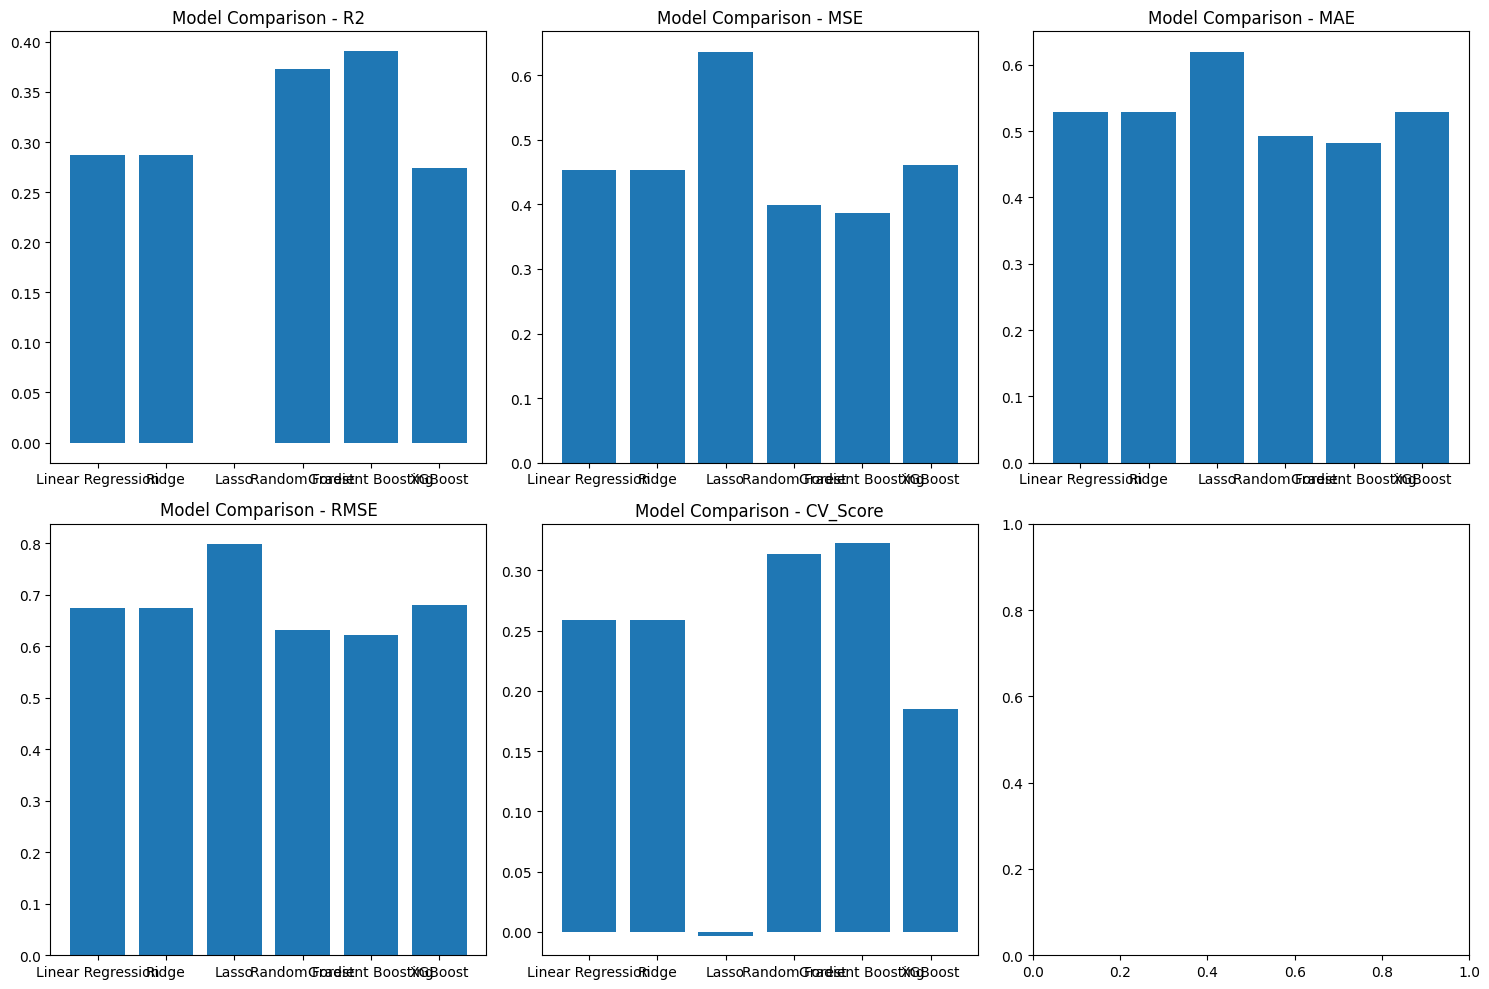

In [42]:
def plot_model_comparison(results):
    metrics = ['R2', 'MSE', 'MAE', 'RMSE', 'CV_Score']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, metric in enumerate(metrics):
        values = [results[model][metric] for model in results.keys()]
        ax = axes[idx]
        ax.bar(results.keys(), values)
        ax.set_title(f'Model Comparison - {metric}')
    
    plt.tight_layout()
    plt.show()

plot_model_comparison(model_results)

In [43]:
def perform_grid_search():
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    }
    
    xgb = XGBRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                             cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    grid_search.fit(X_train_scaled, y_train)
    
    return grid_search

# Perform grid search
grid_search_results = perform_grid_search()

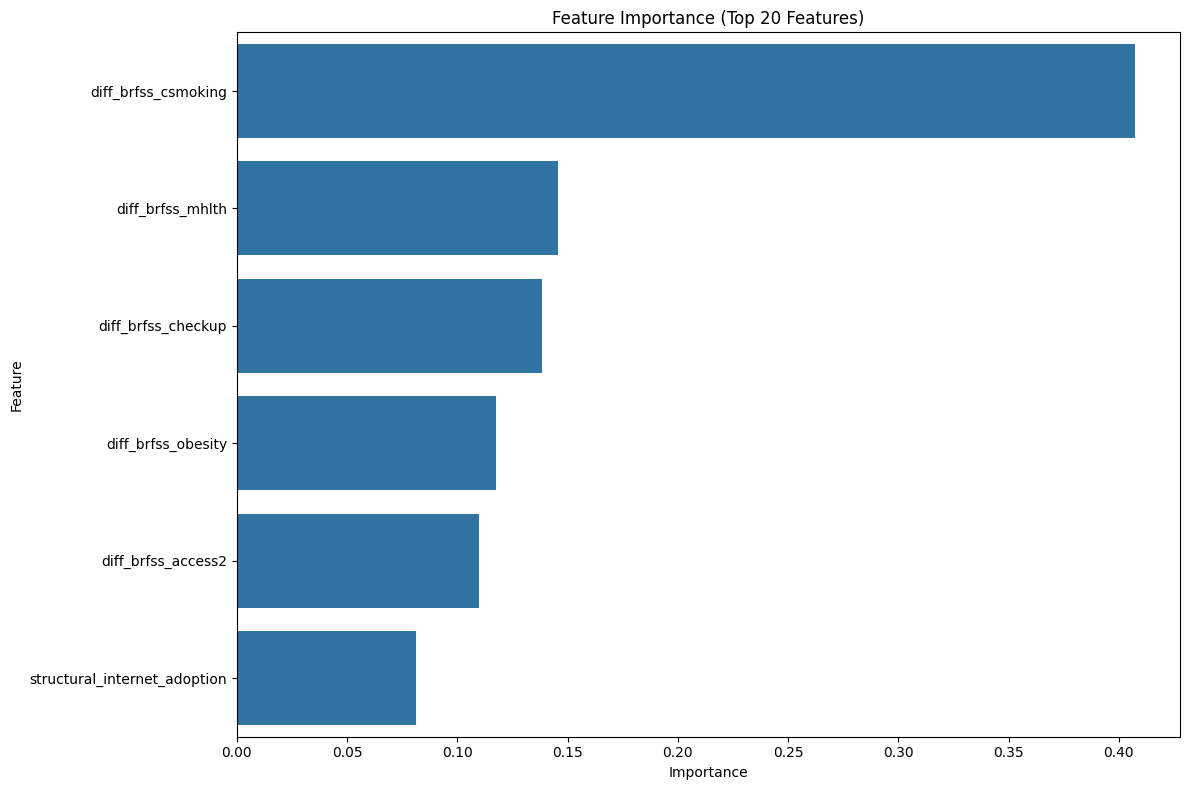

Top 10 most important features:
                        Feature  Importance
2           diff_brfss_csmoking    0.407387
3              diff_brfss_mhlth    0.145494
1            diff_brfss_checkup    0.138459
4            diff_brfss_obesity    0.117497
0            diff_brfss_access2    0.109980
5  structural_internet_adoption    0.081183


In [44]:
def analyze_feature_importance():
    # Train best model from grid search
    best_model = grid_search_results.best_estimator_
    best_model.fit(X_train_scaled, y_train)
    
    # Get feature importance from the model
    importances = best_model.feature_importances_
    
    # Create a DataFrame to sort and visualize feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title('Feature Importance (Top 20 Features)')
    plt.tight_layout()
    plt.show()
    
    # Print top 10 features
    print("Top 10 most important features:")
    print(feature_importance_df.head(10))
    
    return best_model

best_model = analyze_feature_importance()

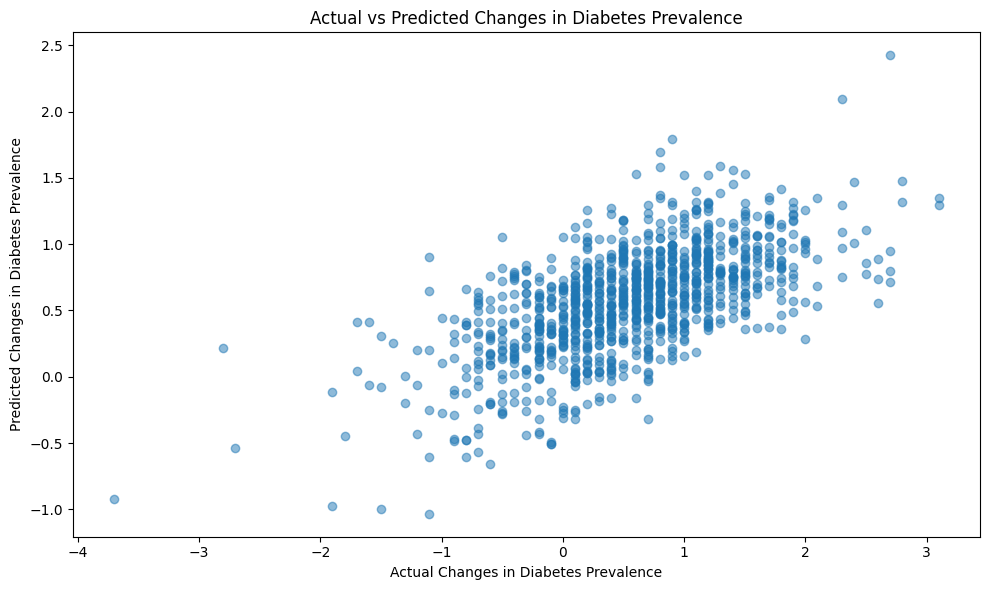

In [46]:
def evaluate_final_model(model, X_test_scaled, y_test):
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    final_metrics = {
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': root_mean_squared_error(y_test, y_pred)
    }
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Changes in Diabetes Prevalence')
    plt.ylabel('Predicted Changes in Diabetes Prevalence')
    plt.title('Actual vs Predicted Changes in Diabetes Prevalence')
    plt.tight_layout()
    plt.show()
    
    return final_metrics

final_metrics = evaluate_final_model(best_model, X_test_scaled, y_test)

In [47]:
final_metrics

{'R2': 0.38196855061233603,
 'MSE': 0.39287748985336324,
 'MAE': 0.4849267762101228,
 'RMSE': 0.6267994016057795}